In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("cirrhosis.csv")

In [3]:
df.shape

(418, 20)

In [4]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [5]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [8]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

AGRUPAMENTO DE VARIÁVEIS CATEGÓRICAS

In [19]:
df.groupby(['Status']).size()

Status
C     232
CL     25
D     161
dtype: int64

In [15]:
df.groupby(['Drug']).size()

Drug
D-penicillamine    158
Placebo            154
dtype: int64

In [21]:
df.groupby(['Sex']).size()

Sex
F    374
M     44
dtype: int64

In [16]:
df.groupby(['Ascites']).size()

Ascites
N    288
Y     24
dtype: int64

In [17]:
df.groupby(['Hepatomegaly']).size()

Hepatomegaly
N    152
Y    160
dtype: int64

In [18]:
df.groupby(['Spiders']).size()

Spiders
N    222
Y     90
dtype: int64

In [22]:
df.groupby(['Edema']).size()

Edema
N    354
S     44
Y     20
dtype: int64

TRATAMENTO DE VARIÁVEIS NUMÉRICAS

In [23]:
df['Cholesterol'].mean()

369.51056338028167

In [24]:
df['Copper'].mean()

97.64838709677419

In [25]:
df['Alk_Phos'].mean()

1982.6557692307692

In [26]:
df['SGOT'].mean()

122.55634615384616

In [27]:
df['Tryglicerides'].mean()

124.70212765957447

In [28]:
df['Platelets'].mean()

257.02457002457004

In [30]:
df['Prothrombin'].mean()

10.731730769230769

In [29]:
df['Stage'].mean()

3.0242718446601944

In [31]:
df.Cholesterol = df.Cholesterol.fillna(369.51056338028167, inplace=False)

In [32]:
df.Copper = df.Copper.fillna(97.64838709677419, inplace=False)

In [33]:
df.Alk_Phos = df.Alk_Phos.fillna(1982.6557692307692, inplace = False)

In [34]:
df.SGOT = df.SGOT.fillna(122.55634615384616, inplace = False)

In [35]:
df.Tryglicerides = df.Tryglicerides.fillna(124.70212765957447, inplace = False)

In [36]:
df.Platelets = df.Platelets.fillna(124.70212765957447, inplace = False)

In [37]:
df.Prothrombin = df.Prothrombin.fillna(10.731730769230769, inplace = False)

In [38]:
df.Stage = df.Stage.fillna(3.0242718446601944, inplace = False)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [44]:
hd = df.dropna(axis=1)

In [45]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Edema          418 non-null    object 
 6   Bilirubin      418 non-null    float64
 7   Cholesterol    418 non-null    float64
 8   Albumin        418 non-null    float64
 9   Copper         418 non-null    float64
 10  Alk_Phos       418 non-null    float64
 11  SGOT           418 non-null    float64
 12  Tryglicerides  418 non-null    float64
 13  Platelets      418 non-null    float64
 14  Prothrombin    418 non-null    float64
 15  Stage          418 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 52.4+ KB


In [47]:
hd.drop(columns=['ID'], inplace=True)


In [48]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Edema          418 non-null    object 
 5   Bilirubin      418 non-null    float64
 6   Cholesterol    418 non-null    float64
 7   Albumin        418 non-null    float64
 8   Copper         418 non-null    float64
 9   Alk_Phos       418 non-null    float64
 10  SGOT           418 non-null    float64
 11  Tryglicerides  418 non-null    float64
 12  Platelets      418 non-null    float64
 13  Prothrombin    418 non-null    float64
 14  Stage          418 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 49.1+ KB


In [49]:
categoricas = ['Status', 'Sex', 'Edema']
numericas = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

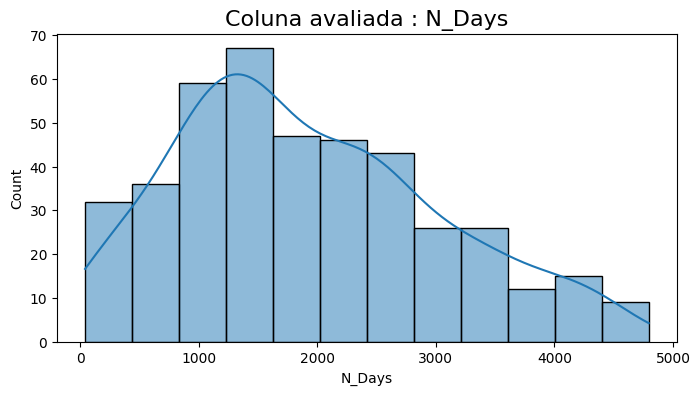

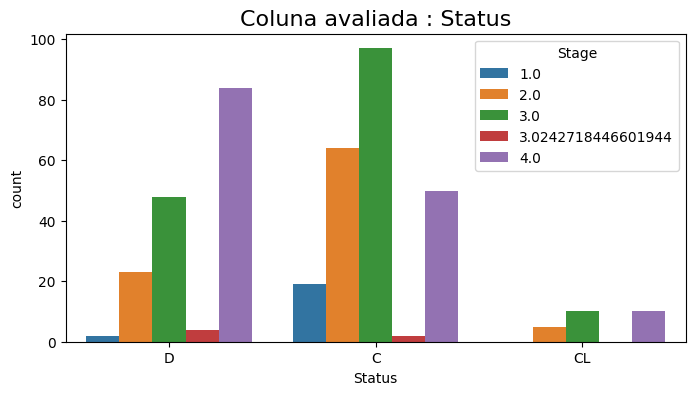

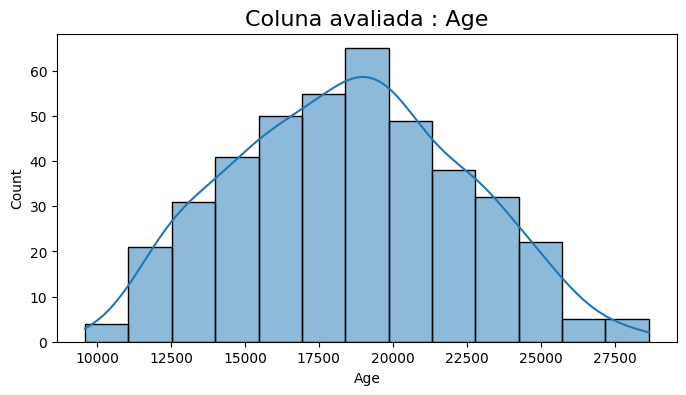

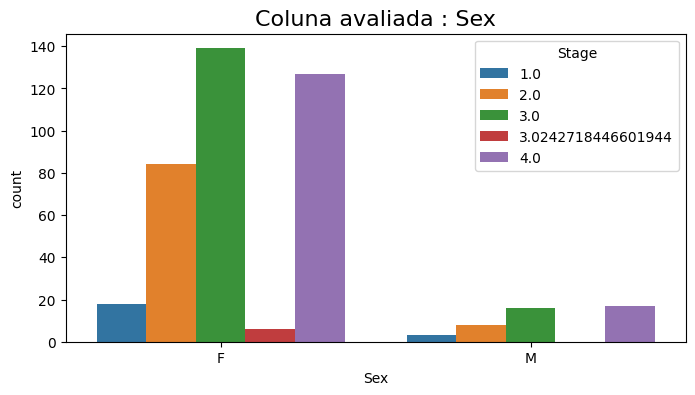

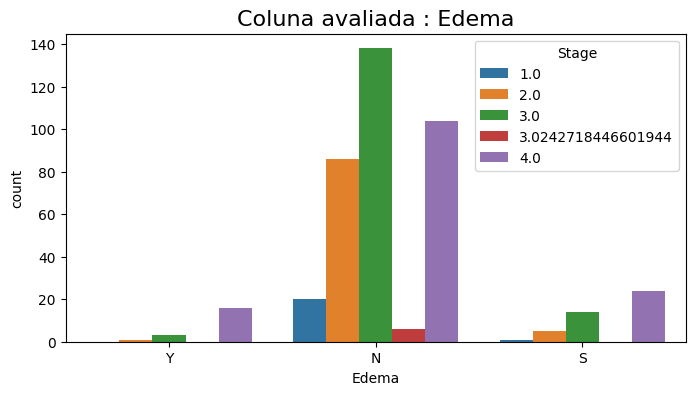

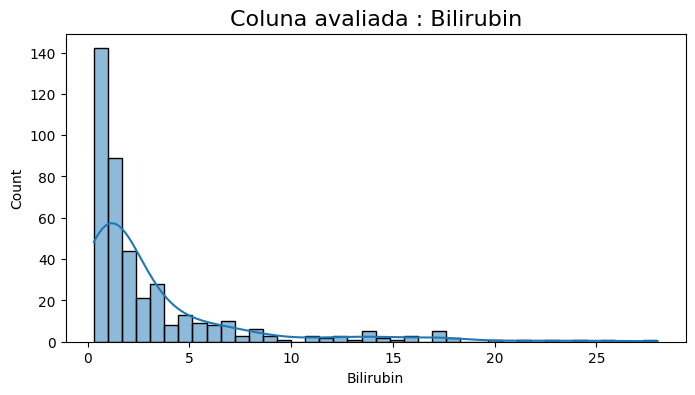

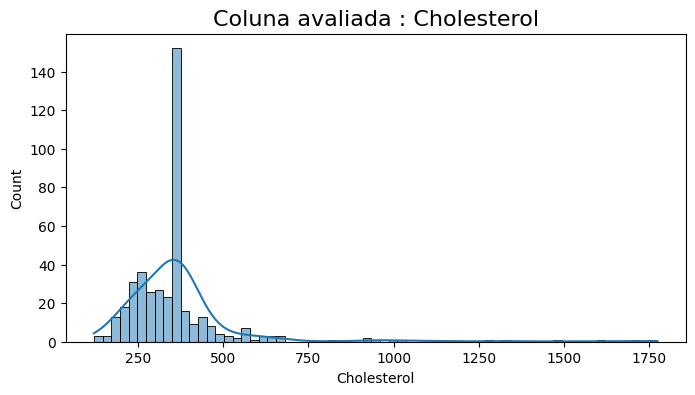

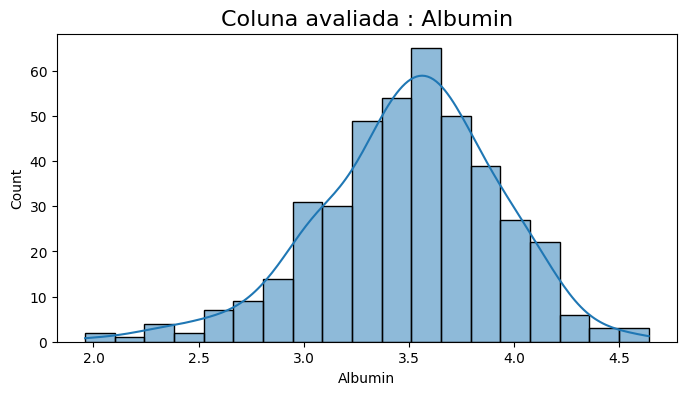

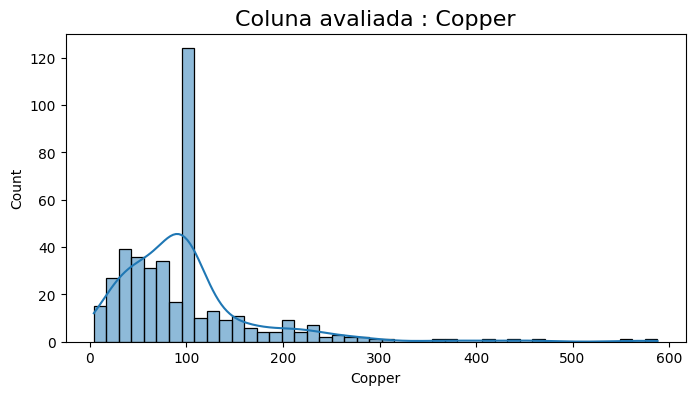

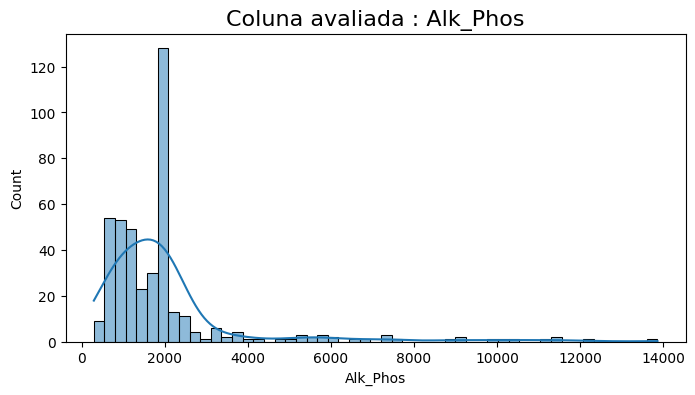

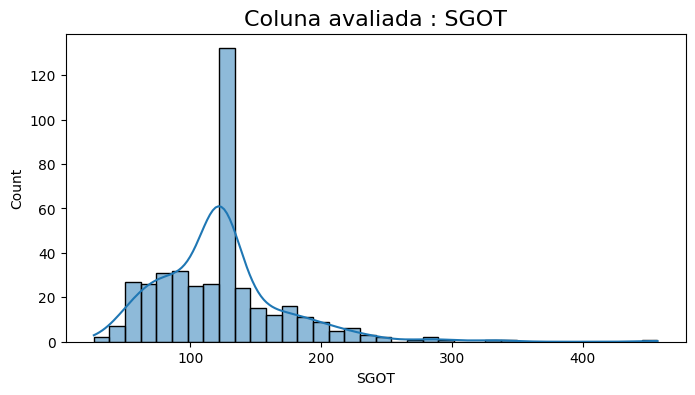

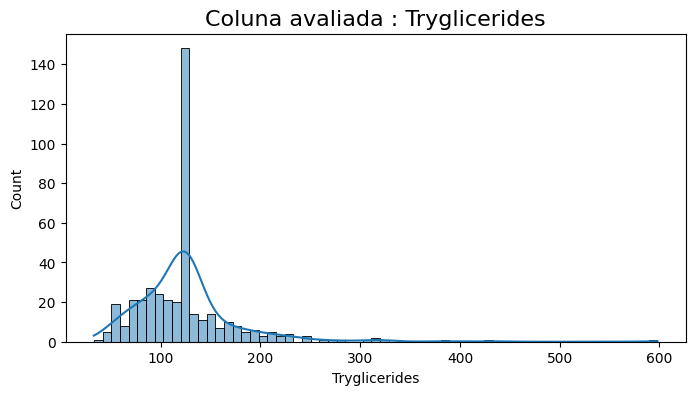

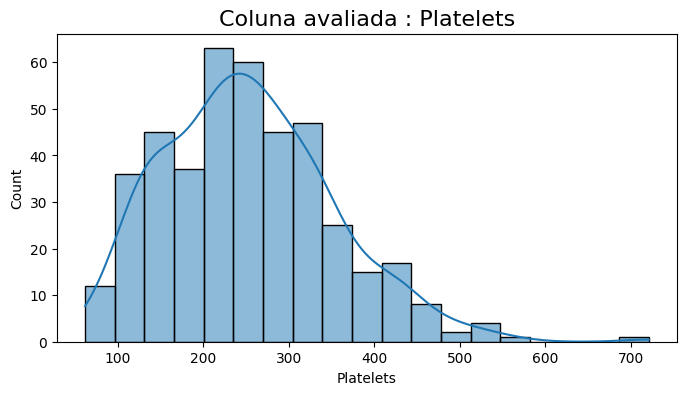

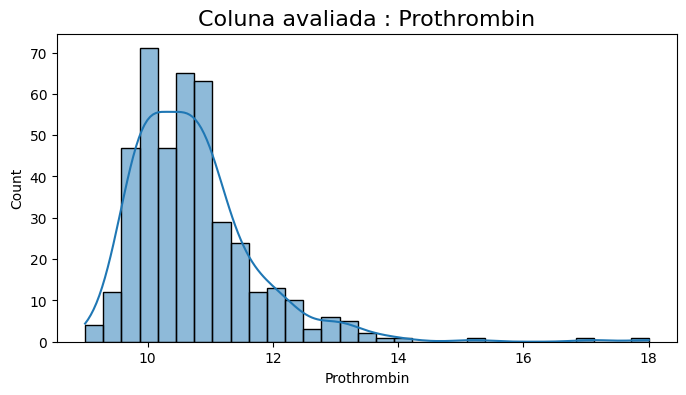

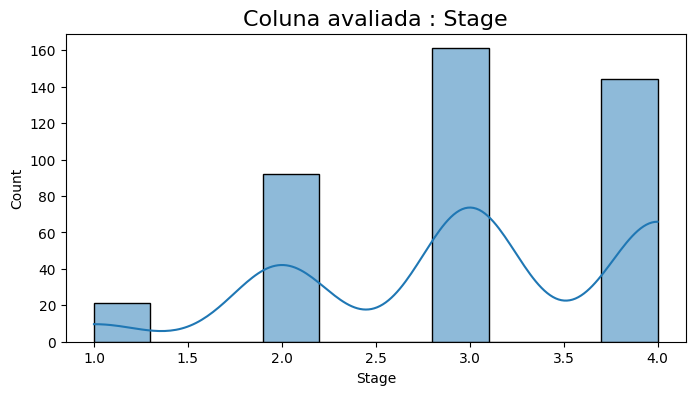

In [51]:
for c in hd.columns:
  plt.figure(figsize = (8, 4))
  plt.title(f"Coluna avaliada : {c}", fontsize = 16)

  if c in categoricas:
    sns.countplot(x = hd[c], hue = hd['Stage'])
  if c in numericas:
    sns.histplot(hd[c], kde = True)

REMOÇÃO DE OUTLIERS


<Axes: >

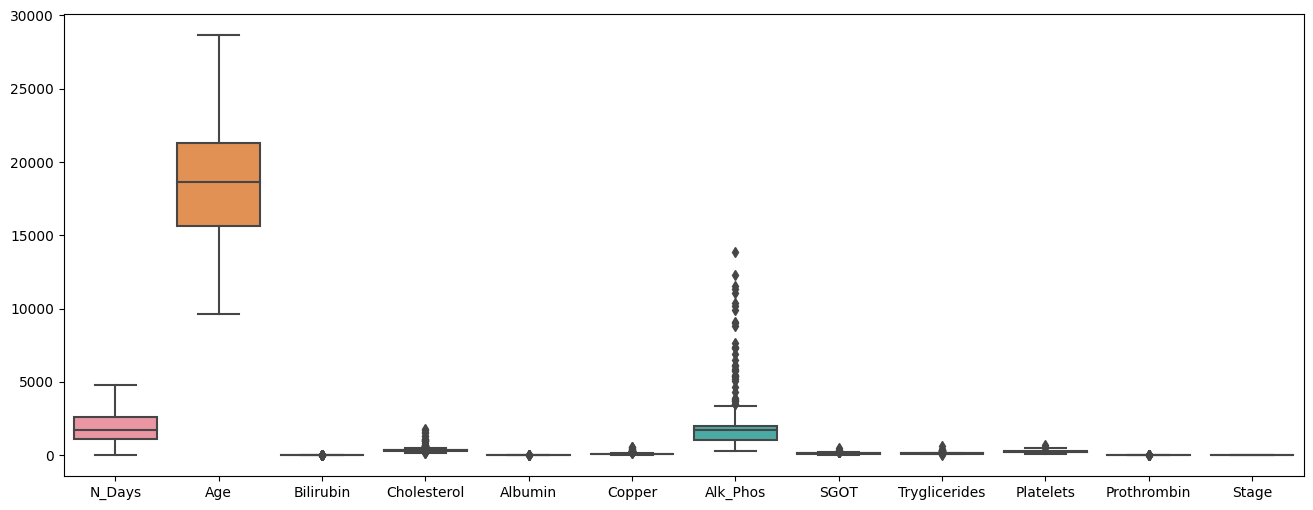

In [52]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd)

In [54]:
hd.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,253.542400,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,191.077413,0.424972,73.697982,1848.437803,48.965657,53.479887,99.310679,1.019547,0.875673
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,181.000000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,369.510563,3.530000,97.648387,1717.000000,122.556346,124.702128,248.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,369.510563,3.770000,100.750000,1982.655769,135.750000,127.750000,315.500000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [57]:
hd['Alk_Phos'].quantile(0.0005)

293.3785

In [61]:
hd1 = hd[hd['Alk_Phos'] < hd['Alk_Phos'].quantile(0.99)]

<Axes: >

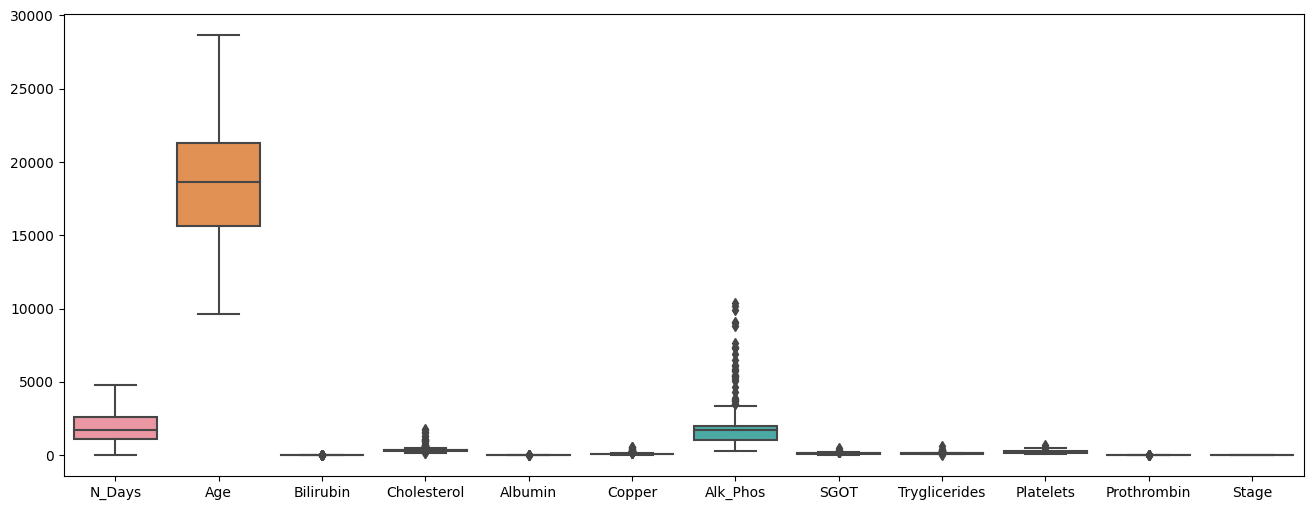

In [62]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd1)

In [137]:
hd3 = pd.get_dummies(hd, columns = ['Status', 'Sex', 'Edema'])
hd3

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Edema_N,Edema_S,Edema_Y
0,400,21464,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000,4.000000,0,0,1,1,0,0,0,1
1,4500,20617,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.000000,10.600000,3.000000,1,0,0,1,0,1,0,0
2,1012,25594,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.000000,12.000000,4.000000,0,0,1,0,1,0,1,0
3,1925,19994,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.000000,10.300000,4.000000,0,0,1,1,0,0,1,0
4,1504,13918,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.000000,10.900000,3.000000,0,1,0,1,0,1,0,0
5,2503,24201,0.8,248.000000,3.98,50.000000,944.000000,93.000000,63.000000,124.702128,11.000000,3.000000,0,0,1,1,0,1,0,0
6,1832,20284,1.0,322.000000,4.09,52.000000,824.000000,60.450000,213.000000,204.000000,9.700000,3.000000,1,0,0,1,0,1,0,0
7,2466,19379,0.3,280.000000,4.00,52.000000,4651.200000,28.380000,189.000000,373.000000,11.000000,3.000000,0,0,1,1,0,1,0,0
8,2400,15526,3.2,562.000000,3.08,79.000000,2276.000000,144.150000,88.000000,251.000000,11.000000,2.000000,0,0,1,1,0,1,0,0
9,51,25772,12.6,200.000000,2.74,140.000000,918.000000,147.250000,143.000000,302.000000,11.500000,4.000000,0,0,1,1,0,0,0,1


In [138]:
hd3['Age'].max(), hd3['Age'].min()

(28650, 9598)

In [141]:
hd3.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Sex_F', 'Sex_M',
       'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [142]:
X = hd3.drop('Status_D', axis = 1)
y = hd3['Status_D']

In [143]:
X

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Sex_F,Sex_M,Edema_N,Edema_S,Edema_Y
0,400,21464,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000,4.000000,0,0,1,0,0,0,1
1,4500,20617,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.000000,10.600000,3.000000,1,0,1,0,1,0,0
2,1012,25594,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.000000,12.000000,4.000000,0,0,0,1,0,1,0
3,1925,19994,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.000000,10.300000,4.000000,0,0,1,0,0,1,0
4,1504,13918,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.000000,10.900000,3.000000,0,1,1,0,1,0,0
5,2503,24201,0.8,248.000000,3.98,50.000000,944.000000,93.000000,63.000000,124.702128,11.000000,3.000000,0,0,1,0,1,0,0
6,1832,20284,1.0,322.000000,4.09,52.000000,824.000000,60.450000,213.000000,204.000000,9.700000,3.000000,1,0,1,0,1,0,0
7,2466,19379,0.3,280.000000,4.00,52.000000,4651.200000,28.380000,189.000000,373.000000,11.000000,3.000000,0,0,1,0,1,0,0
8,2400,15526,3.2,562.000000,3.08,79.000000,2276.000000,144.150000,88.000000,251.000000,11.000000,2.000000,0,0,1,0,1,0,0
9,51,25772,12.6,200.000000,2.74,140.000000,918.000000,147.250000,143.000000,302.000000,11.500000,4.000000,0,0,1,0,0,0,1


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [145]:
log = LogisticRegression(max_iter = 100)

In [146]:
log.fit(X_train, y_train)

LogisticRegression()

In [102]:
log.score(X_train, y_train)

0.7857142857142857

In [103]:
log.score(X_test, y_test)

0.7898550724637681

In [104]:
y_previsto = log.predict(X_test)
y_previsto

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=uint8)

In [105]:
accuracy_score(y_test, y_previsto)

0.7898550724637681

In [106]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        83
           1       0.75      0.71      0.73        55

    accuracy                           0.79       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138



In [147]:
def relatorio_ml(hd3, algoritmo, opt = 2):
  X = hd3.drop('Status_D', axis = 1)
  y = hd3['Status_D']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acurácia de treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acurácia teste : {score_test * 100:.2f}%")

  y_previsto = log.predict(X_test)
  print("----------CLASSIFICATION REPORT--------")
  print(classification_report(y_test, y_previsto))
  print("----------CONFUSION MATRIX------------")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_test

Acurácia de treino: 97.50%
Acurácia teste : 95.65%
----------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        83
           1       0.75      0.71      0.73        55

    accuracy                           0.79       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138

----------CONFUSION MATRIX------------


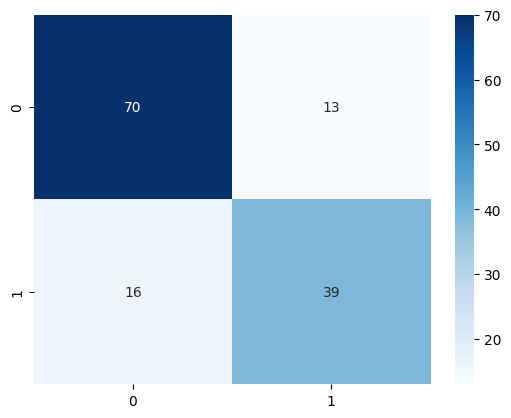

In [148]:
log_train, log_test = relatorio_ml(hd3, LogisticRegression, opt = 0)

Acurácia de treino: 100.00%
Acurácia teste : 100.00%
----------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        83
           1       0.75      0.71      0.73        55

    accuracy                           0.79       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138

----------CONFUSION MATRIX------------


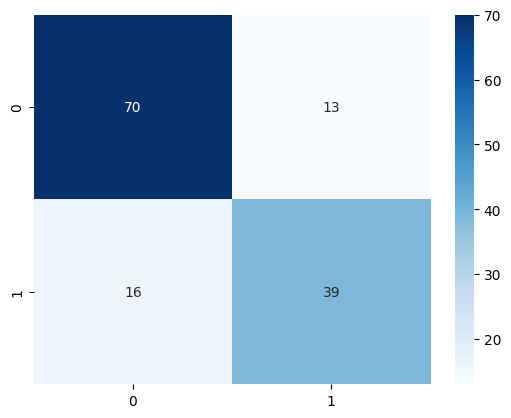

In [113]:
tree_train, tree_test = relatorio_ml(hd3, DecisionTreeClassifier)

Acurácia de treino: 100.00%
Acurácia teste : 100.00%
----------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        83
           1       0.75      0.71      0.73        55

    accuracy                           0.79       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138

----------CONFUSION MATRIX------------


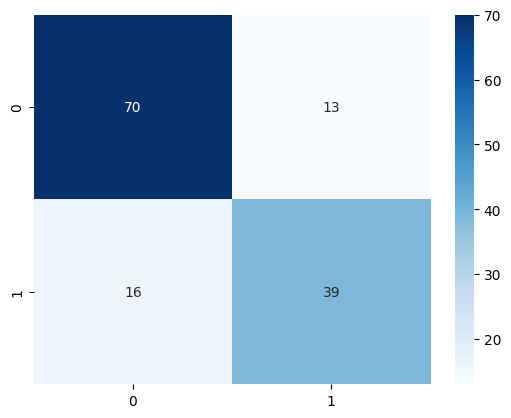

In [114]:
ada_train, ada_test = relatorio_ml(hd3, AdaBoostClassifier)

Acurácia de treino: 76.79%
Acurácia teste : 77.54%
----------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        83
           1       0.75      0.71      0.73        55

    accuracy                           0.79       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138

----------CONFUSION MATRIX------------


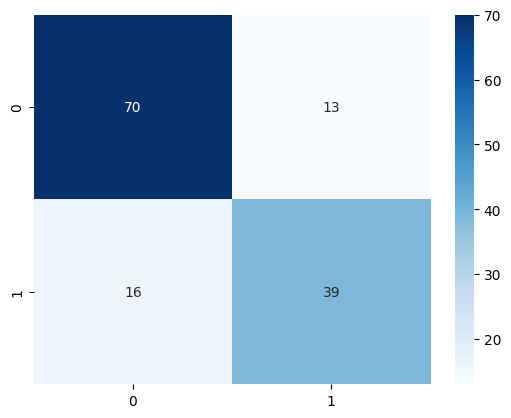

In [115]:
kn_train, kn_test = relatorio_ml(hd3, KNeighborsClassifier)

Acurácia de treino: 100.00%
Acurácia teste : 99.28%
----------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        83
           1       0.75      0.71      0.73        55

    accuracy                           0.79       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138

----------CONFUSION MATRIX------------


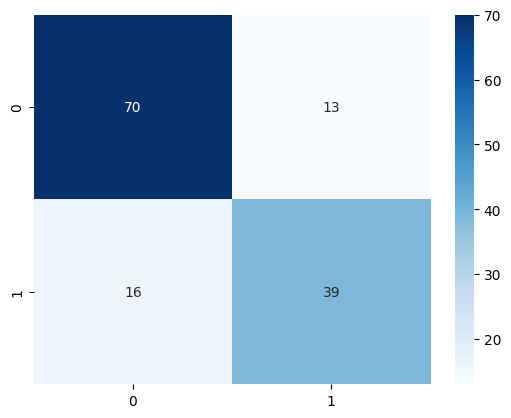

In [158]:
rand_train, rand_test = relatorio_ml(hd3, RandomForestClassifier)

In [119]:
data = {'Models' : ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Bost'],
        'Acurácia treino' : [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                             round(rand_train * 100, 2), round(ada_train * 100, 2)],
        'Acurácia teste' : [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                            round(rand_test * 100, 2), round(ada_test * 100, 2)],
        }

hd3 = pd.DataFrame(data)
hd3.sort_values(by = 'Acurácia teste', ascending = False,inplace = True )
hd3

,Models,Acurácia treino,Acurácia teste
1,Decision Tree,100.00,100.00
3,Random Forest Classifier,100.00,100.00
4,Ada Bost,100.00,100.00
0,Logistic Regression,97.50,95.65
2,KNeighbors,76.79,77.54


In [156]:
def relatorio_ml_scaler(df, algoritmo, opt = 2):
  X = hd3.drop('Status_D', axis = 1)
  y = hd3['Status_D']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  scaler = StandardScaler()
  cols_scaler = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
  X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
  X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acurácia de treino: {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print(f"Acurácia teste : {score_test * 100:.2f}%")

  y_previsto = log.predict(X_test)
  print("----------CLASSIFICATION REPORT--------")
  print(classification_report(y_test, y_previsto))
  print("----------CONFUSION MATRIX------------")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_test

Acurácia de treino: 100.00%
Acurácia teste : 100.00%
----------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        48
           1       1.00      0.69      0.82        36

    accuracy                           0.87        84
   macro avg       0.91      0.85      0.86        84
weighted avg       0.89      0.87      0.86        84

----------CONFUSION MATRIX------------


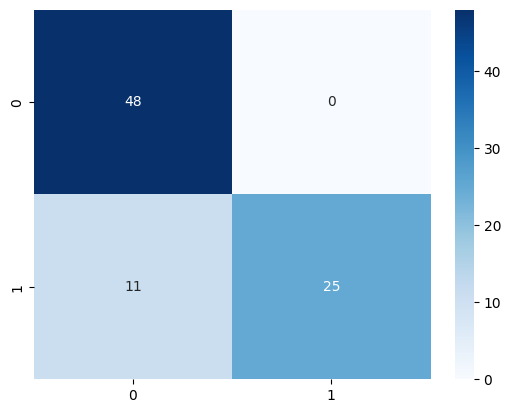

In [150]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(hd3, LogisticRegression, opt = 0)